# SFRD from IR based data

Until now, we have been using UV observations to determine the luminosity functions and SFRDs from it. Now, let's turn our attention to the IR data. We currently have three references for such observations. We, for now, focus on these data. We try to propagate the errors correctly. Below, we show this computation. We also save the computed SFRDs from IR data for further uses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import os
import utils as utl
import irlf as irlf

In [2]:
# Defining kappa and luminosity range

kap_ir = 4.5*10**(-44)
lums_ir1 = np.logspace(6, 15, 10000)*con.L_sun.value*1e7

# limit of integration
ltt2 = 0.001/kap_ir

# Making a list of IR data
p1 = os.getcwd() + '/data/New_IR/'
p2 = os.getcwd() + '/Results/Diff_lim_IR/'

list1 = os.listdir(p1)

In [3]:
f33 = open(p2 + 'sfrd_ir_new_0.001.dat','w')
f33.write('#Name_of_the_paper\tZ_down\tZ_up\tSFRD\tSFRD_err\n')

for i in range(len(list1)):
    z1_ir, z2_ir, alp_ir, alperr_ir, lst_ir, lsterr_ir, sig_ir, sigerr_ir, phi_ir, phierr_ir = np.loadtxt(p1 + list1[i], usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)
    ppr_n1 = np.loadtxt(p1 + list1[i], usecols=10, dtype=str, unpack=True)
    if type(alp_ir) == np.float64:
        z1_ir, z2_ir, alp_ir, alperr_ir, lst_ir, lsterr_ir, sig_ir, sigerr_ir, phi_ir, phierr_ir, ppr_n1 = np.array([z1_ir]), np.array([z2_ir]), np.array([alp_ir]), np.array([alperr_ir]), np.array([lst_ir]), np.array([lsterr_ir]), np.array([sig_ir]), np.array([sigerr_ir]), np.array([phi_ir]), np.array([phierr_ir]), np.array([ppr_n1])
    sfrd_ir12, sfrd_ir12_err = np.array([]), np.array([])
    for j in range(len(z1_ir)):
        sfrd_ir, sfrd_err_ir = irlf.sfrd_w_err(lum=lums_ir1, lst9=lst_ir[j], lst9err=lsterr_ir[j], phi9=phi_ir[j], phi9err=phierr_ir[j], sig9=sig_ir[j], sig9err=sigerr_ir[j], alp9=alp_ir[j], alp9err=alperr_ir[j], kappa=kap_ir, limit=ltt2)
        sfrd_ir12 = np.hstack((sfrd_ir12, sfrd_ir))
        sfrd_ir12_err = np.hstack((sfrd_ir12_err, sfrd_err_ir))
        f33.write(ppr_n1[0] + '\t' + str(z1_ir[j]) + '\t' + str(z2_ir[j]) + '\t' + str(sfrd_ir) + '\t' + str(sfrd_err_ir) + '\n')

f33.close()

100%|██████████| 10000/10000 [02:10<00:00, 76.67it/s]


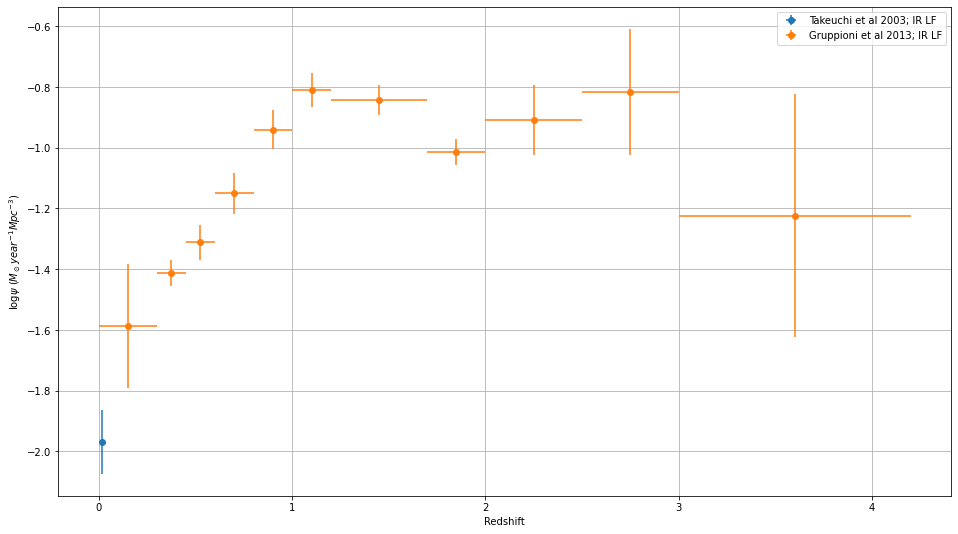

In [4]:
ppr_ir = np.array(['Takeuchi_et_al_2003', 'Gruppioni_et_al_2013'])

# Loading papers
ppr_ir1 = np.loadtxt(p2 + 'sfrd_ir_new_0.001.dat', usecols=0, unpack=True, dtype=str)
zd_ir, zu_ir, sfrd_ir, sfrd_ir_err = np.loadtxt(p2 + 'sfrd_ir_new_0.001.dat', usecols=(1,2,3,4), unpack=True)
zcen_ir = (zd_ir + zu_ir)/2
zup, zdo = np.abs(zu_ir - zcen_ir), np.abs(zcen_ir - zd_ir)
log_sfrd_ir, log_sfrd_ir_err = utl.log_err(sfrd_ir, sfrd_ir_err)

plt.figure(figsize=(16, 9))
# Plotting them
for i in range(len(ppr_ir)):
    zc_ir, zp, zn, lg_sf, lg_sfe = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    for j in range(len(ppr_ir1)):
        if ppr_ir1[j] == ppr_ir[i]:
            zc_ir = np.hstack((zc_ir, zcen_ir[j]))
            lg_sf = np.hstack((lg_sf, log_sfrd_ir[j]))
            lg_sfe = np.hstack((lg_sfe, log_sfrd_ir_err[j]))
            zp = np.hstack((zp, zup[j]))
            zn = np.hstack((zn, zdo[j]))
    plt.errorbar(zc_ir, lg_sf, xerr=[zn, zp], yerr=lg_sfe, label=ppr_ir[i].replace('_',' ') + '; IR LF', fmt='o')

#plt.plot(znew, psi2, label='Best fitted function')
plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.legend(loc='best')